<a href="https://colab.research.google.com/github/Sirilak-1447/ImageProcessing/blob/main/blended.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install pillow-heif

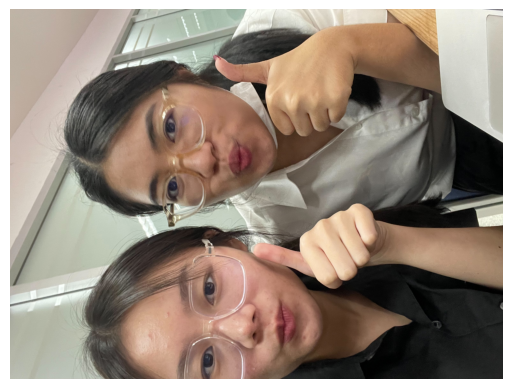

In [ ]:
import sys
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

src_path = '/content/drive/MyDrive/Khim_imageclass/'
image = Image.open(src_path + '04_1.jpg')

plt.imshow(image)
plt.axis('off')
plt.show()


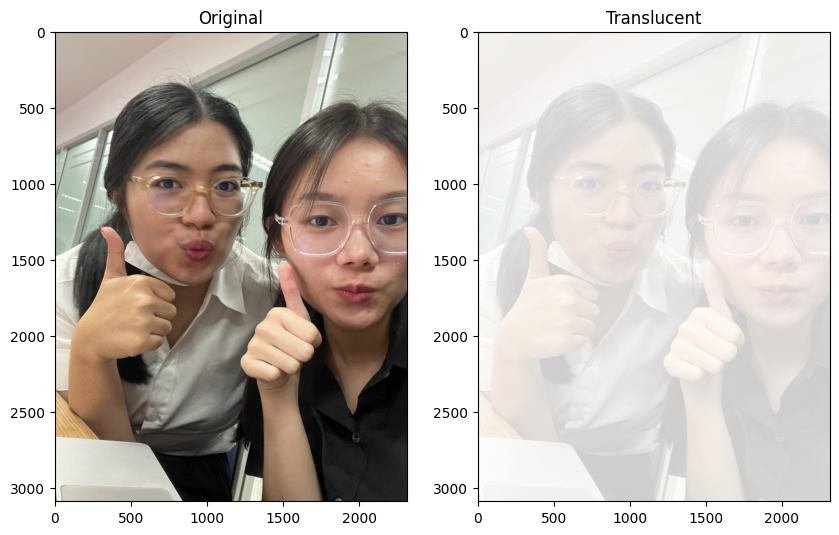

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

src_path = '/content/drive/MyDrive/Khim_imageclass/04_1.jpg'
img_bgr = cv2.imread(src_path)

img_rgba = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGBA)
img_rgba_backup = img_rgba.copy()

alpha = 150
img_rgba[:,:,3] = alpha

plt.figure(figsize=(10, 7))
rows = 1; cols = 2; index = 1


plt.subplot(rows, cols, index); index += 1
plt.imshow(img_rgba_backup, cmap=None)
plt.title('Original')

plt.subplot(rows, cols, index); index += 1
plt.imshow(img_rgba, cmap=None)
plt.title('Translucent')

plt.savefig('/content/drive/MyDrive/Khim_imageclass'+'Pic01.png', bbox_inches='tight')
plt.show()

In [ ]:
print(f'Image shape: {img_rgba.shape}')

Image shape: (3088, 2316, 4)


In [ ]:
file_path = '/content/drive/MyDrive/Khim_imageclass/Pic01.png'
file_name = 'Pic01'
file_format = '.png'

In [ ]:
img_rgba = cv2.cvtColor(img_rgba, cv2.COLOR_BGR2RGBA)
cv2.imwrite(file_path + file_name + file_format, img_rgba)

True

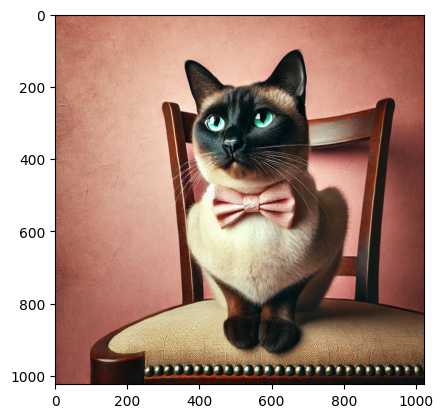

In [ ]:
import requests

url = 'https://cmu.to/DemoCat2PNG'
response = requests.get(url)
if response.status_code != 200:
    print('Error: Image not found.')
    sys.exit(1)

img_opaque = cv2.imdecode(np.frombuffer(response.content, dtype=np.uint8), cv2.IMREAD_COLOR)
if img_opaque is None:
    print('Error: Image not decoded.')
    sys.exit(2)

img_opaque_rgb = cv2.cvtColor(img_opaque, cv2.COLOR_BGR2RGB)
plt.imshow(img_opaque_rgb, cmap=None)
plt.show()

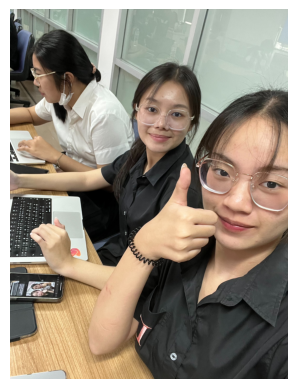

In [ ]:

file_path = '/content/drive/MyDrive/Khim_imageclass/04_2.jpg'
img_opaque = cv2.imread(file_path)

if img_opaque is None:
    print('Error: Image not loaded.')
else:
    img_opaque_rgb = cv2.cvtColor(img_opaque, cv2.COLOR_BGR2RGB)
    plt.imshow(img_opaque_rgb)
    plt.axis('off')
    plt.show()


In [ ]:
print(f'Image shape: {img_rgba.shape}')

Image shape: (3088, 2316, 4)


In [ ]:
img_translucent_rgba_resized = cv2.resize(img_rgba, (img_opaque_rgb.shape[1], img_opaque_rgb.shape[0]))

In [ ]:
# Extract the alpha channel from the translucent image.
alpha_channel = img_translucent_rgba_resized[:, :, 3] / 255.

# Extract the RGB channels from the translucent image.
rgb_channel = img_translucent_rgba_resized[:, :, :3]

# Perform alpha blending.
img_blended = np.zeros_like(img_opaque_rgb)
for ch in range(3):
    img_blended[:, :, ch] = rgb_channel[:, :, ch] * alpha_channel + \
                            img_opaque_rgb[:, :, ch] * (1 - alpha_channel)

cv2.imwrite(file_path+'DemoCat_Blended.png', cv2.cvtColor(img_blended, cv2.COLOR_RGB2BGR))

True

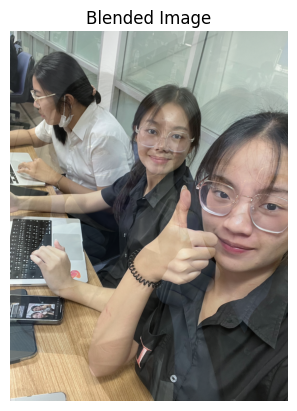

True

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt


img_translucent_rgba_resized = cv2.resize(img_rgba, (img_opaque_rgb.shape[1], img_opaque_rgb.shape[0]))


alpha_channel = img_translucent_rgba_resized[:, :, 3] / 255.
rgb_channel = img_translucent_rgba_resized[:, :, :3]


img_blended = np.zeros_like(img_opaque_rgb, dtype=np.uint8)
for ch in range(3):
    img_blended[:, :, ch] = (rgb_channel[:, :, ch] * alpha_channel +
                             img_opaque_rgb[:, :, ch] * (1 - alpha_channel)).astype(np.uint8)


plt.imshow(img_blended)
plt.axis('off')
plt.title('Blended Image')
plt.show()

file_path = '/content/drive/MyDrive/Khim_imageclass/'
cv2.imwrite(file_path + 'Gq_Tongta_Khim.png', cv2.cvtColor(img_blended, cv2.COLOR_RGB2BGR))
